In [1]:
import os

os.chdir(os.path.dirname(os.getcwd()))

In [2]:
import libs.analysis
import libs.ensemble
import libs.vars
import matplotlib
import xarray

matplotlib.rcParams.update({ 'font.size': 18 })

import warnings
warnings.filterwarnings('ignore')

/home/users/woodward/.conda/envs/climate/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
# ----- SPECIFIC SETTINGS -----
component = 'SImon'
experiment = 'ssp585'
variable_id = 'siconc'

In [4]:
ensemble_si, weight_si = libs.ensemble.get_and_preprocess(
    component, 
    experiment, 
    variable_id
)

ensemble_prra, weight_prra = libs.ensemble.get_and_preprocess(
    'Amon', 
    experiment, 
    'prra'
)

ensemble_prsn, weight_prsn = libs.ensemble.get_and_preprocess(
    'Amon', 
    experiment, 
    'prsn'
)

ensemble_tas, weight_tas = libs.ensemble.get_and_preprocess(
    'Amon', 
    experiment, 
    'tas'
)

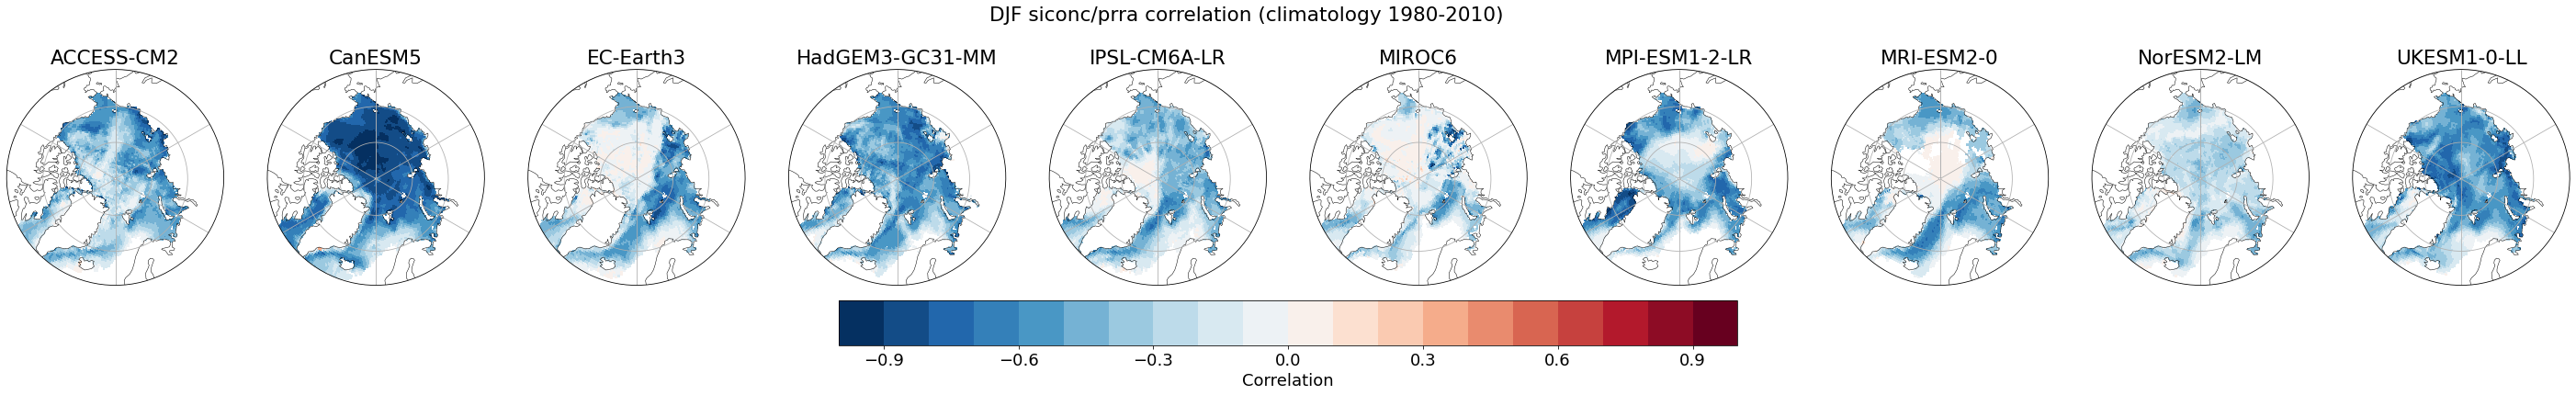

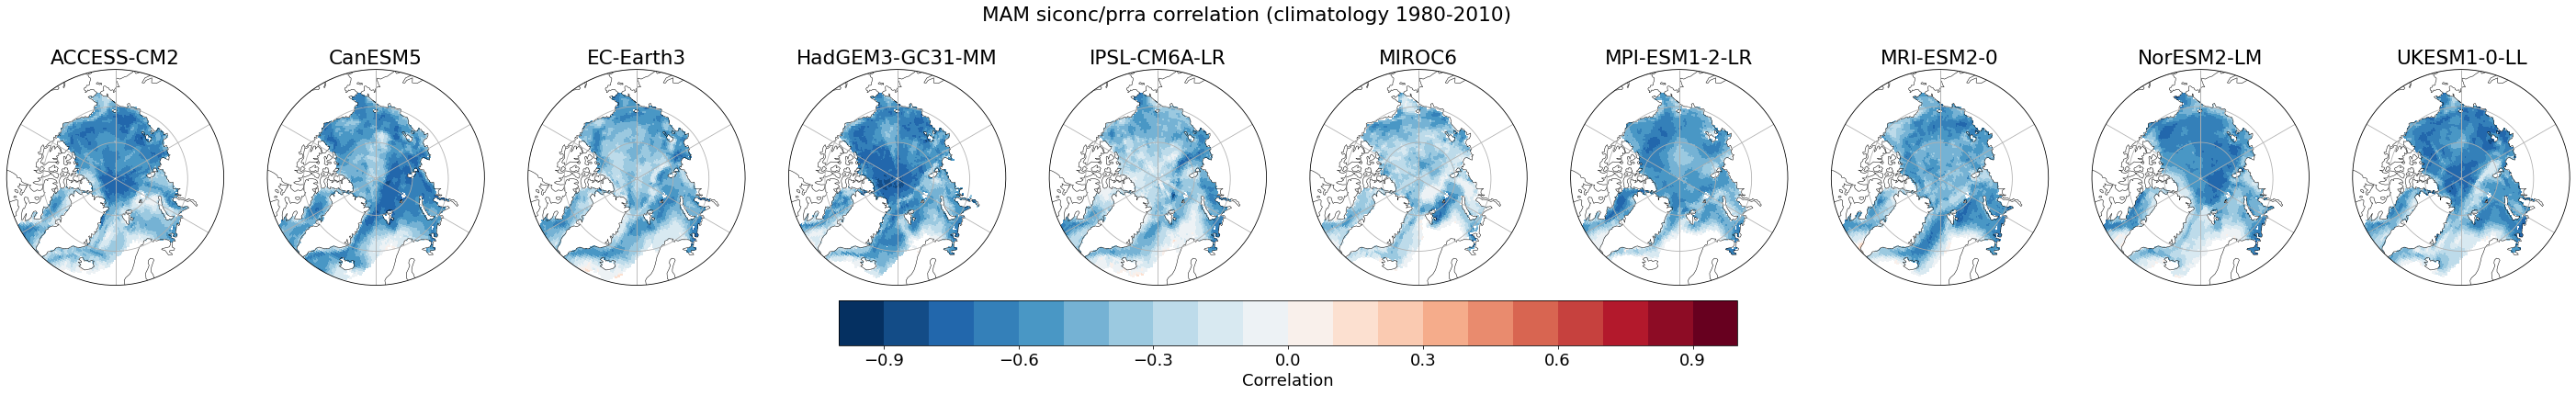

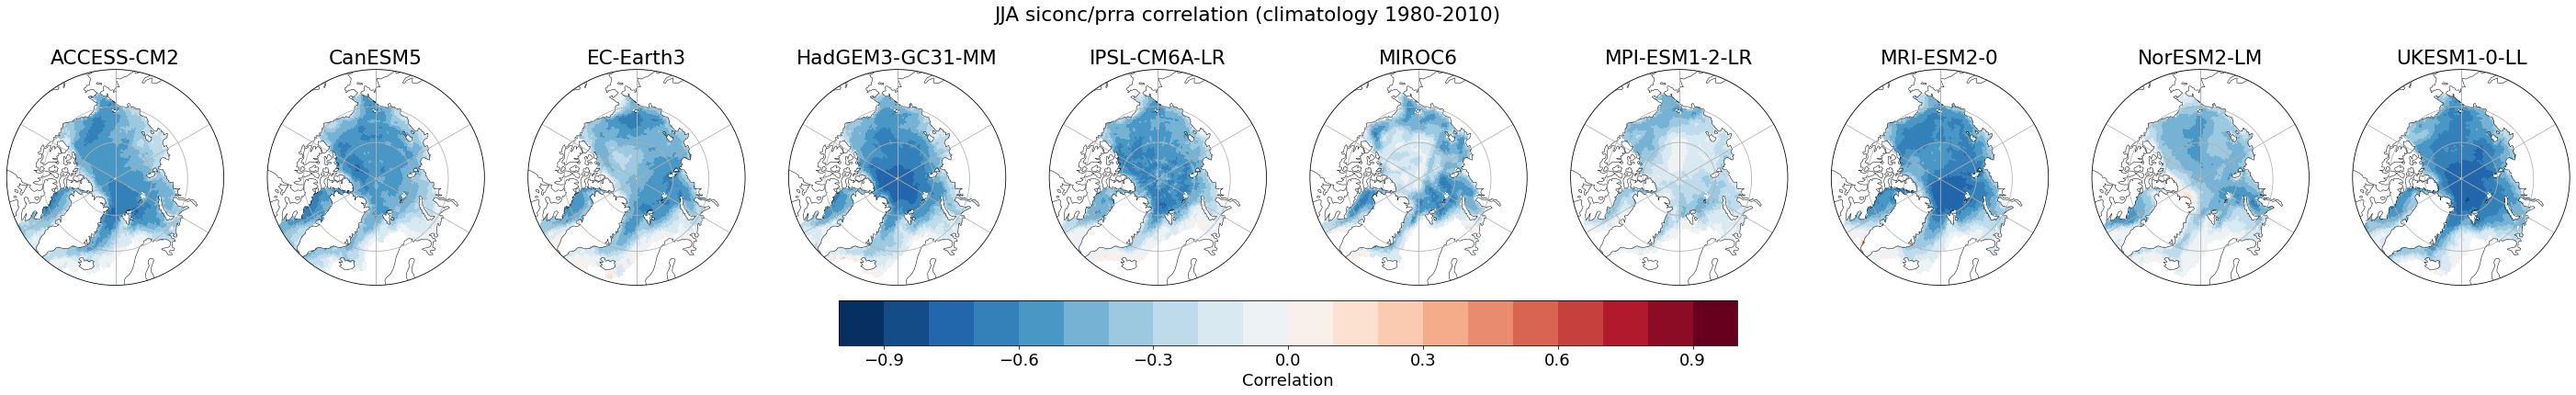

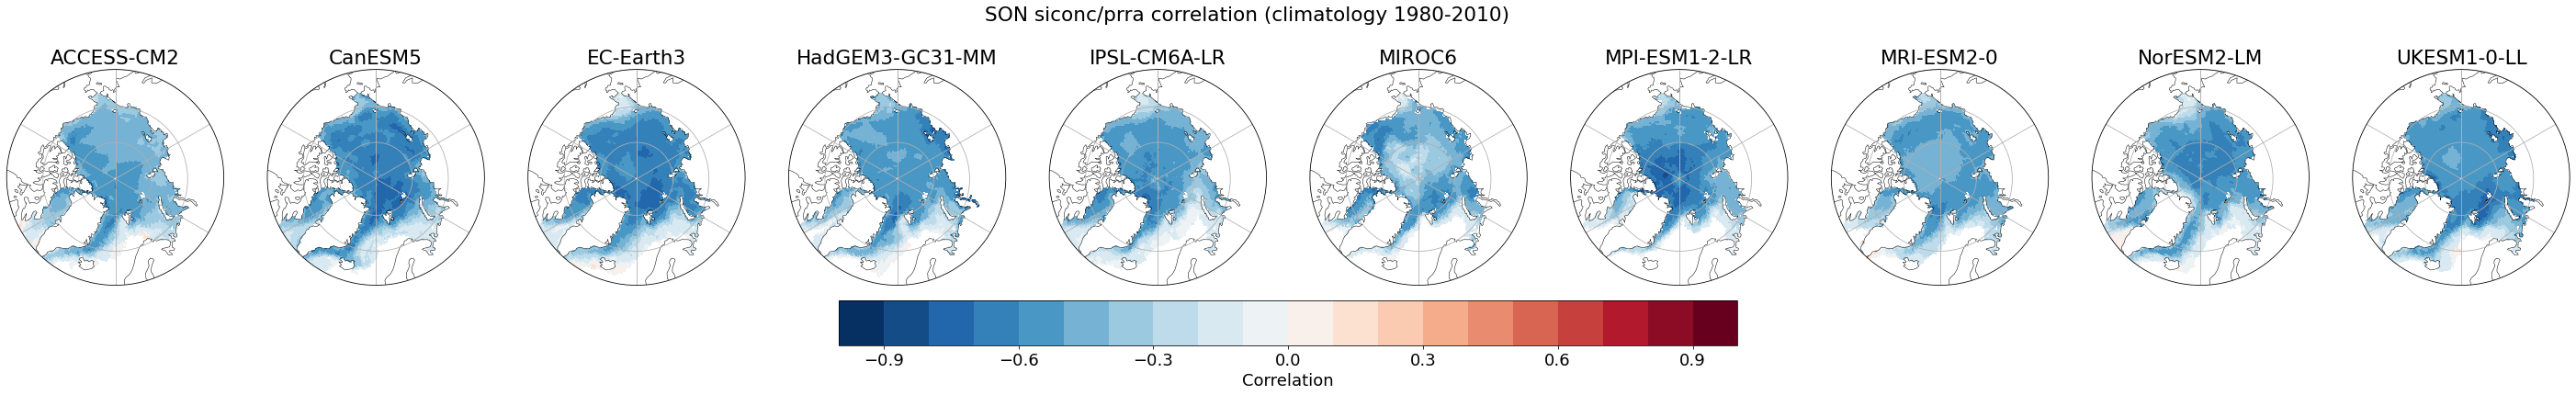

In [5]:
libs.analysis.correlation_spatial_clim(
    ensemble_si,
    ensemble_prra,
    correlation_period=slice('1980-01-01', '2061-01-01')
)

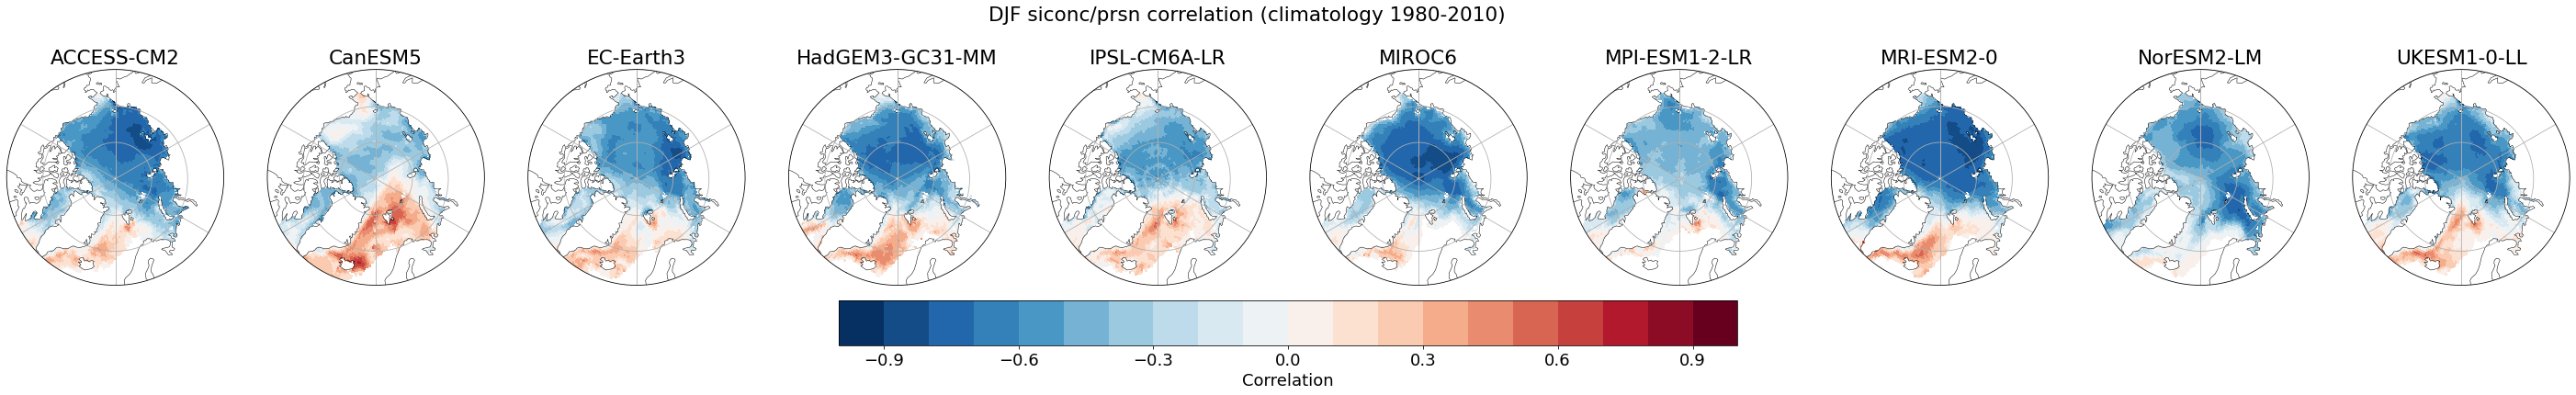

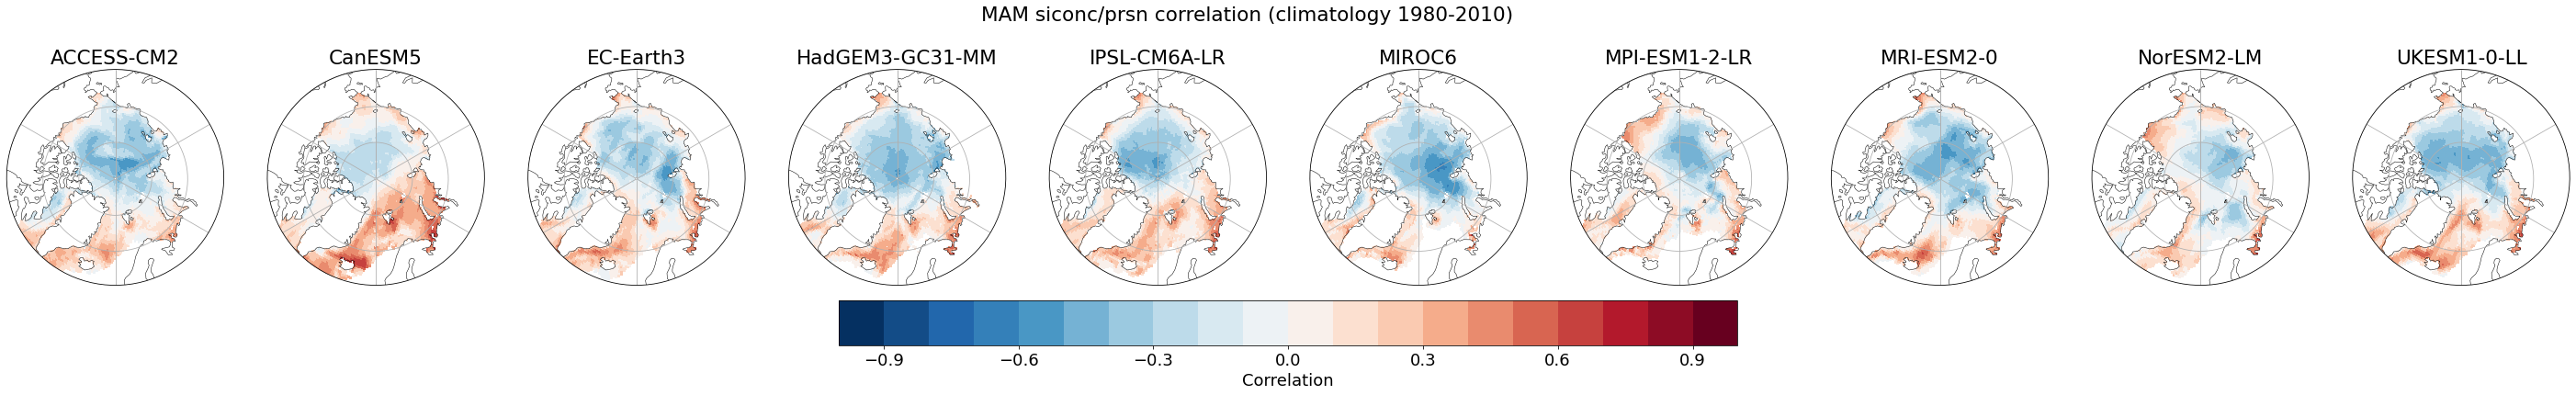

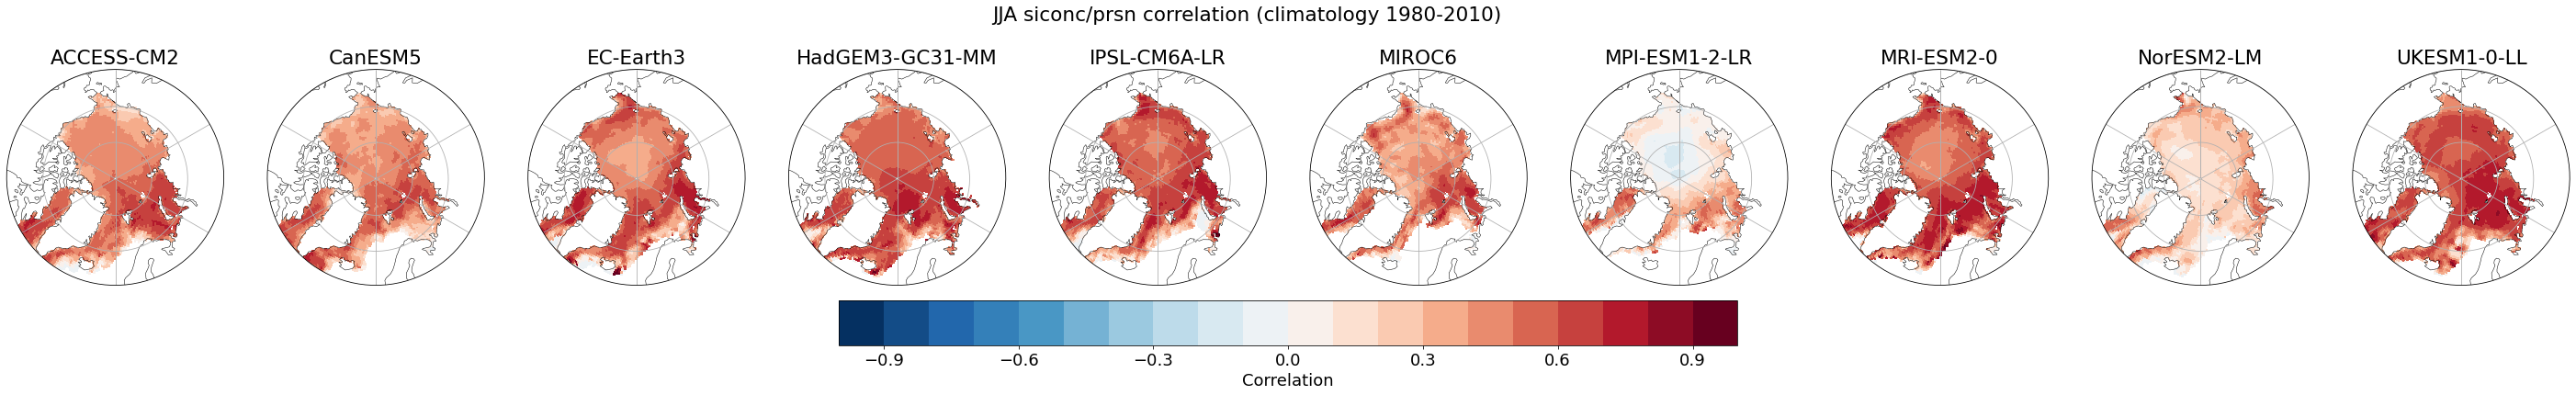

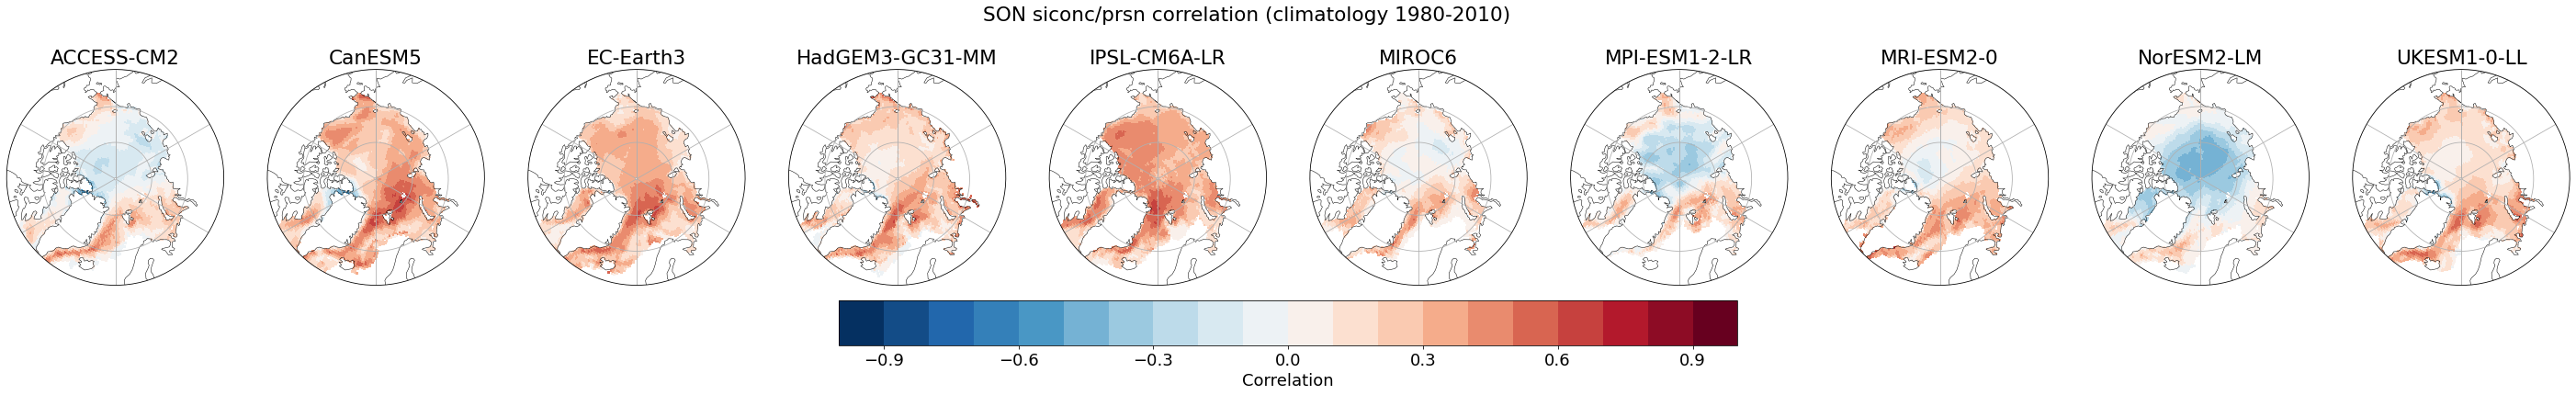

In [5]:
libs.analysis.correlation_spatial_clim(ensemble_si, ensemble_prsn)

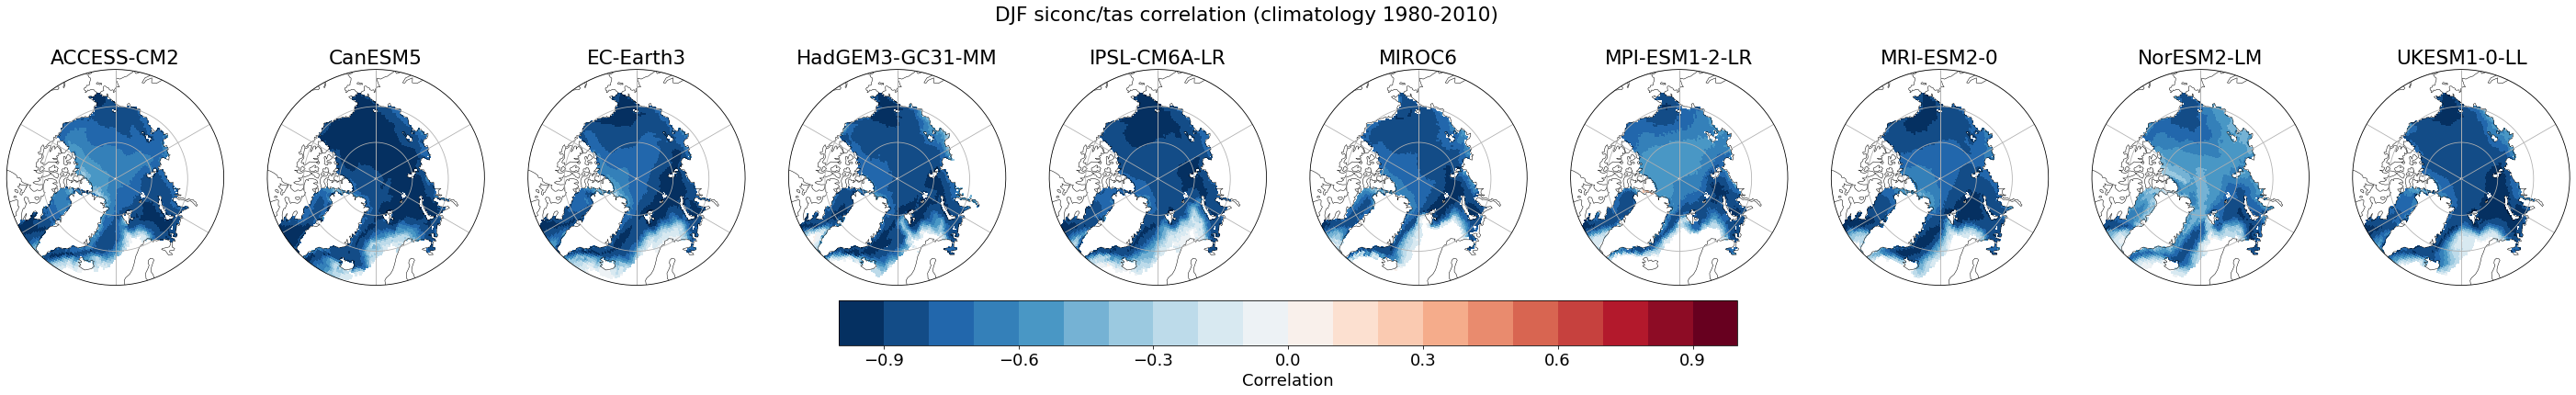

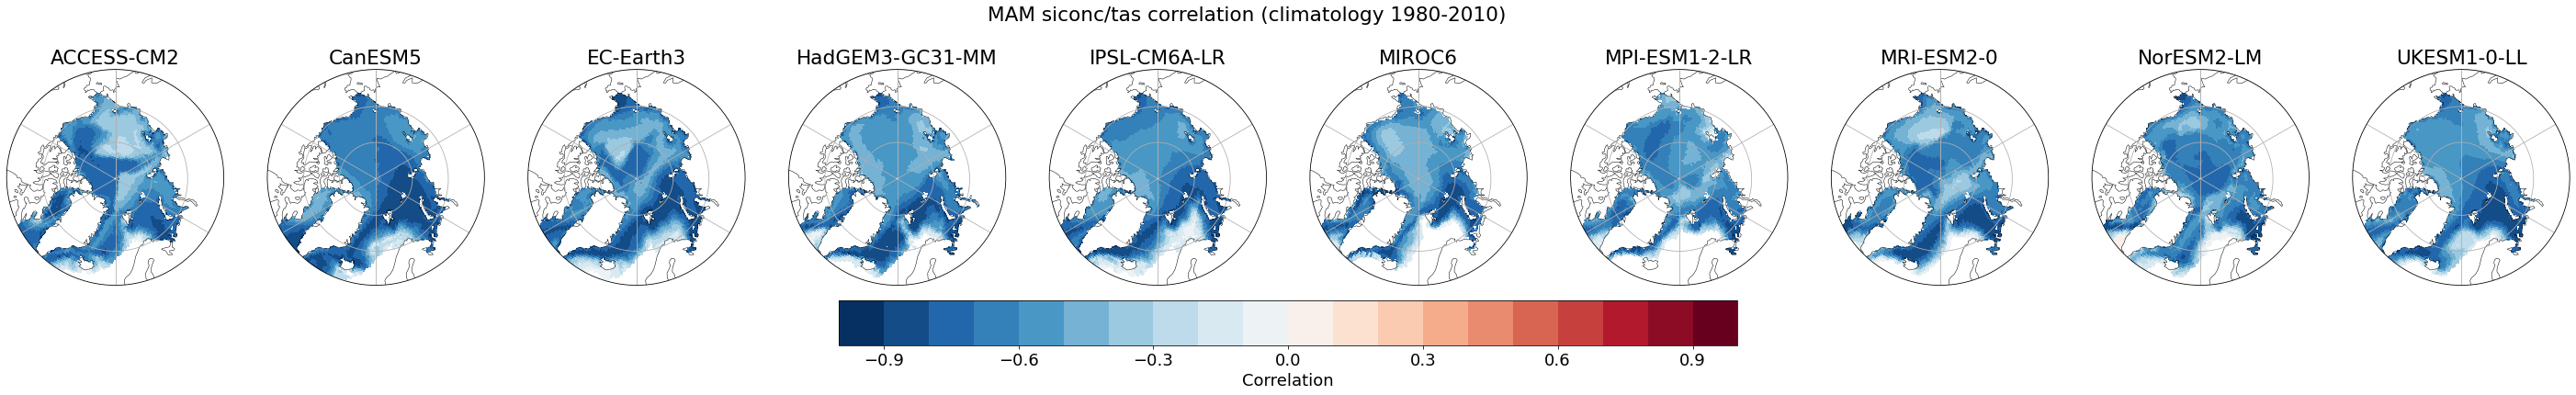

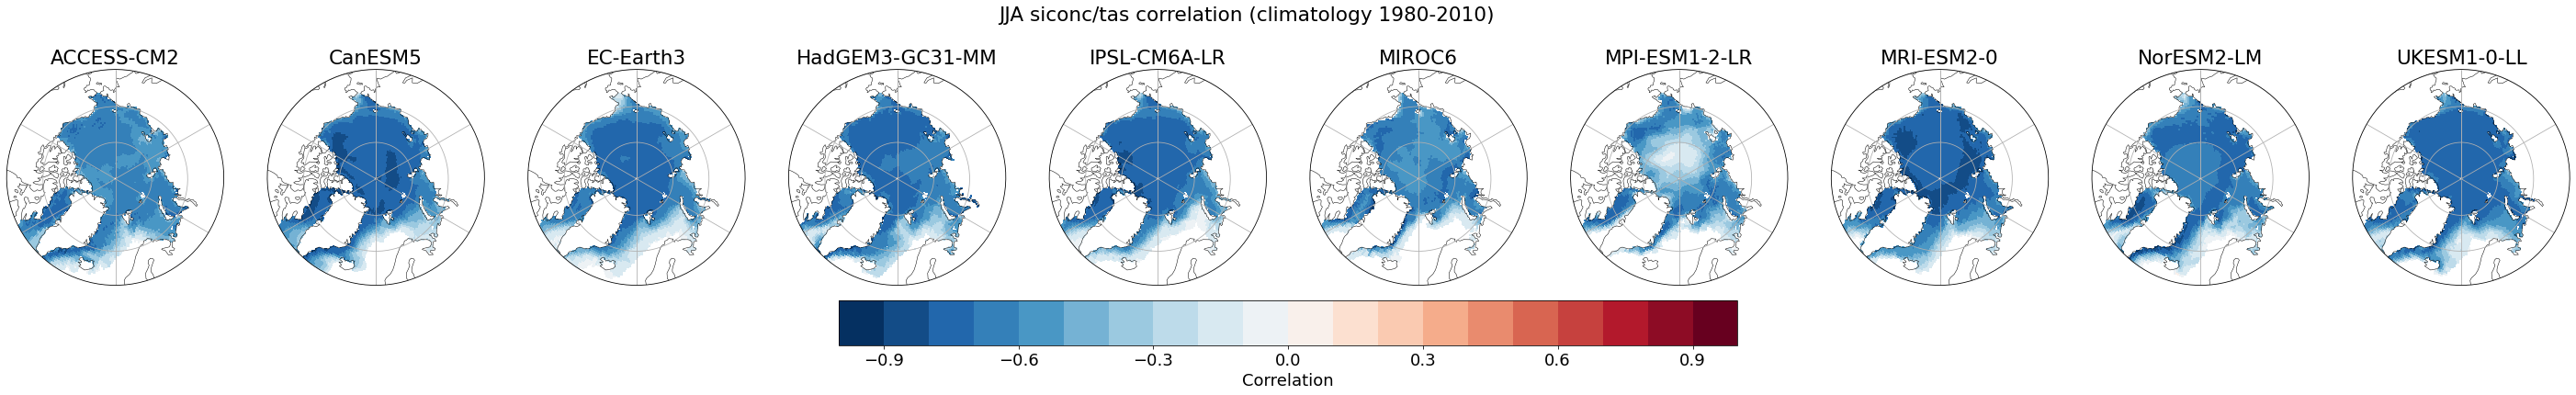

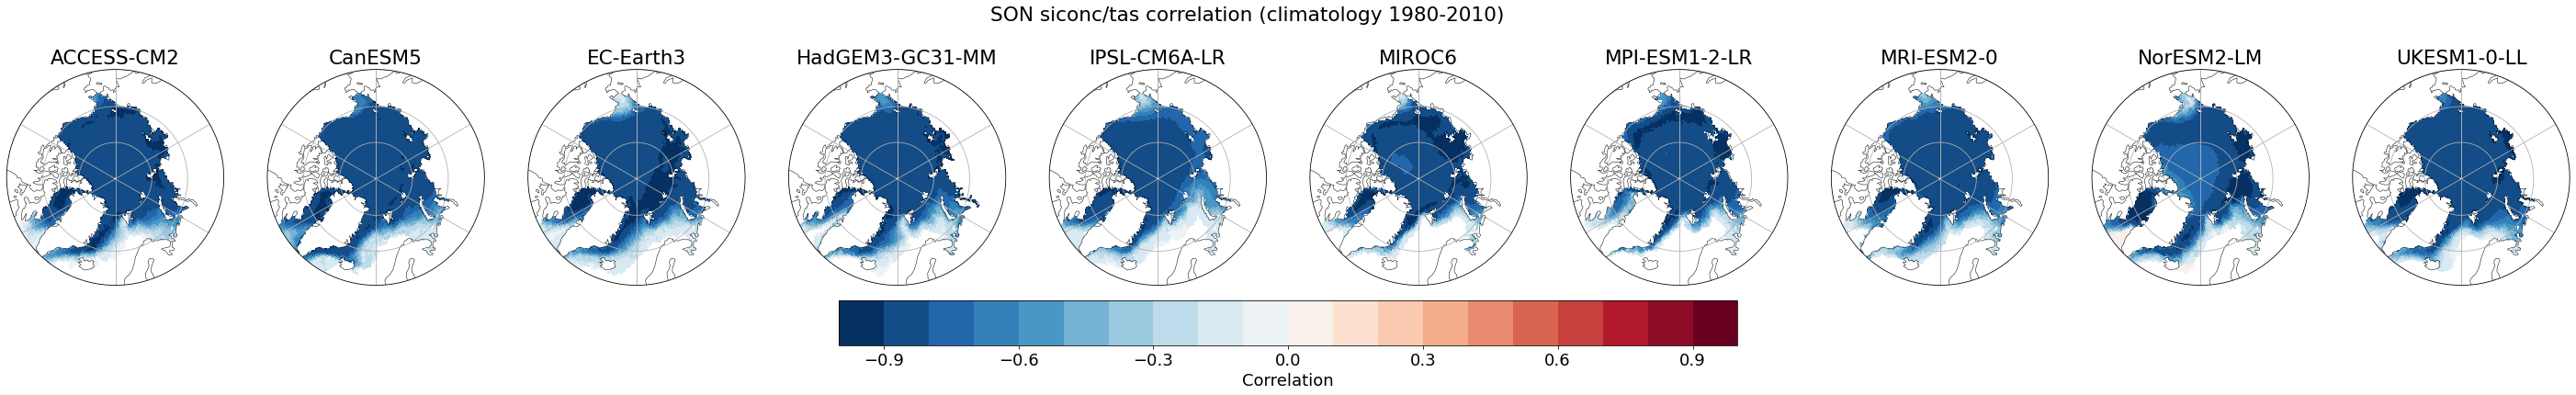

In [6]:
libs.analysis.correlation_spatial_clim(ensemble_si, ensemble_tas)

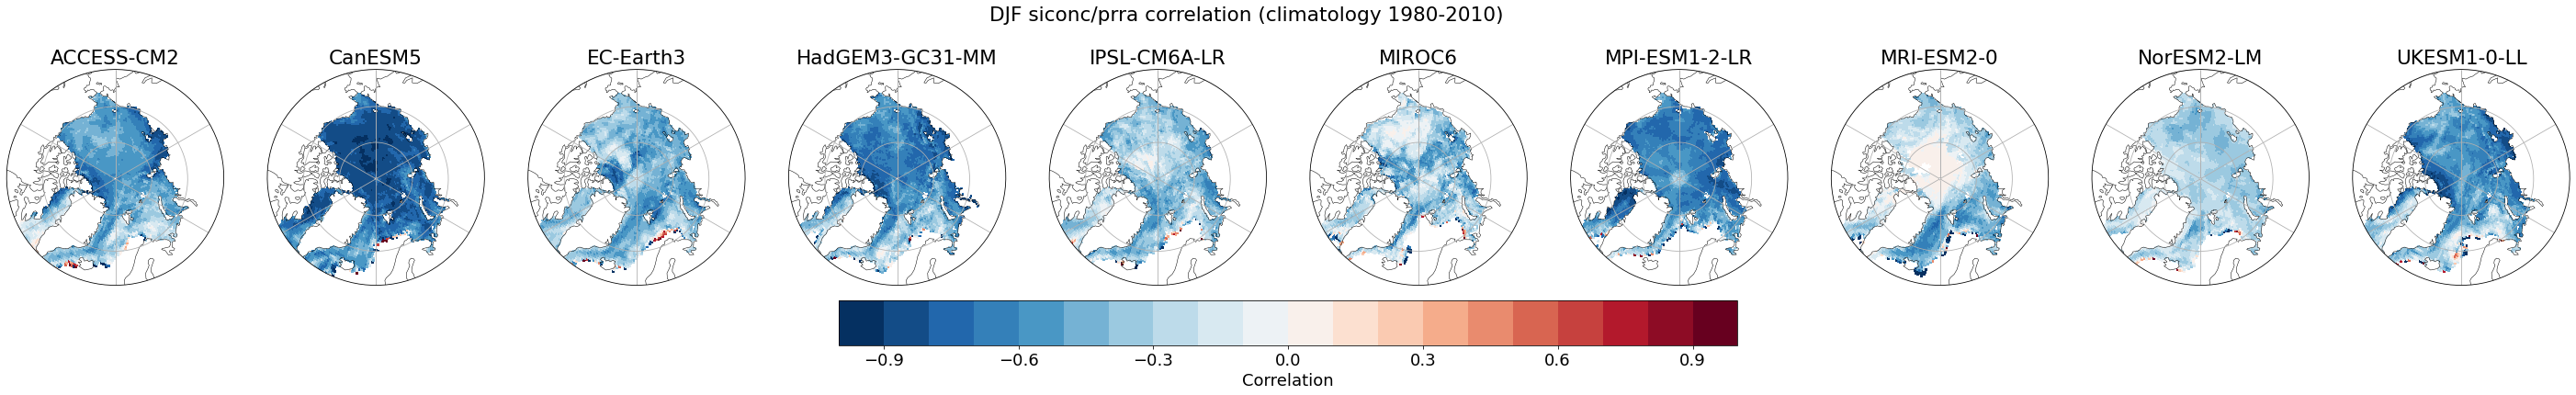

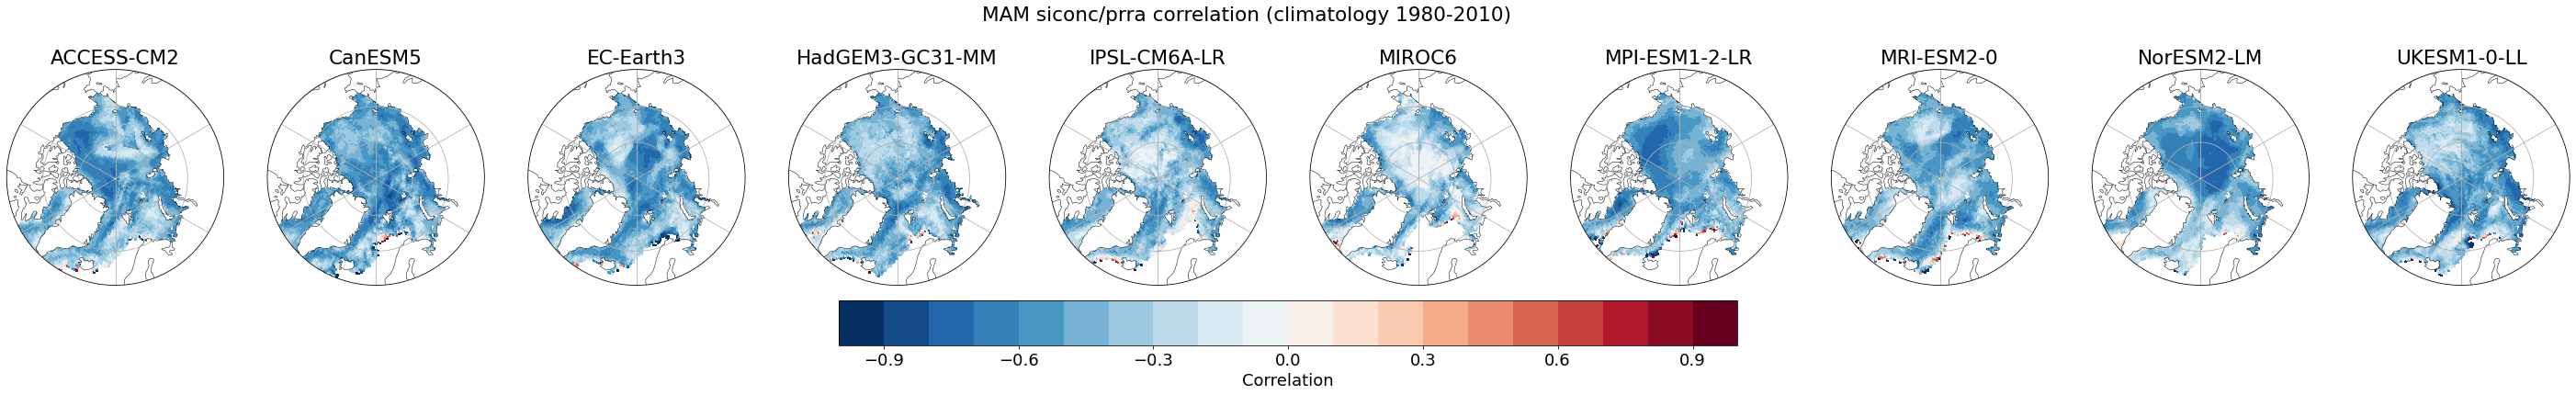

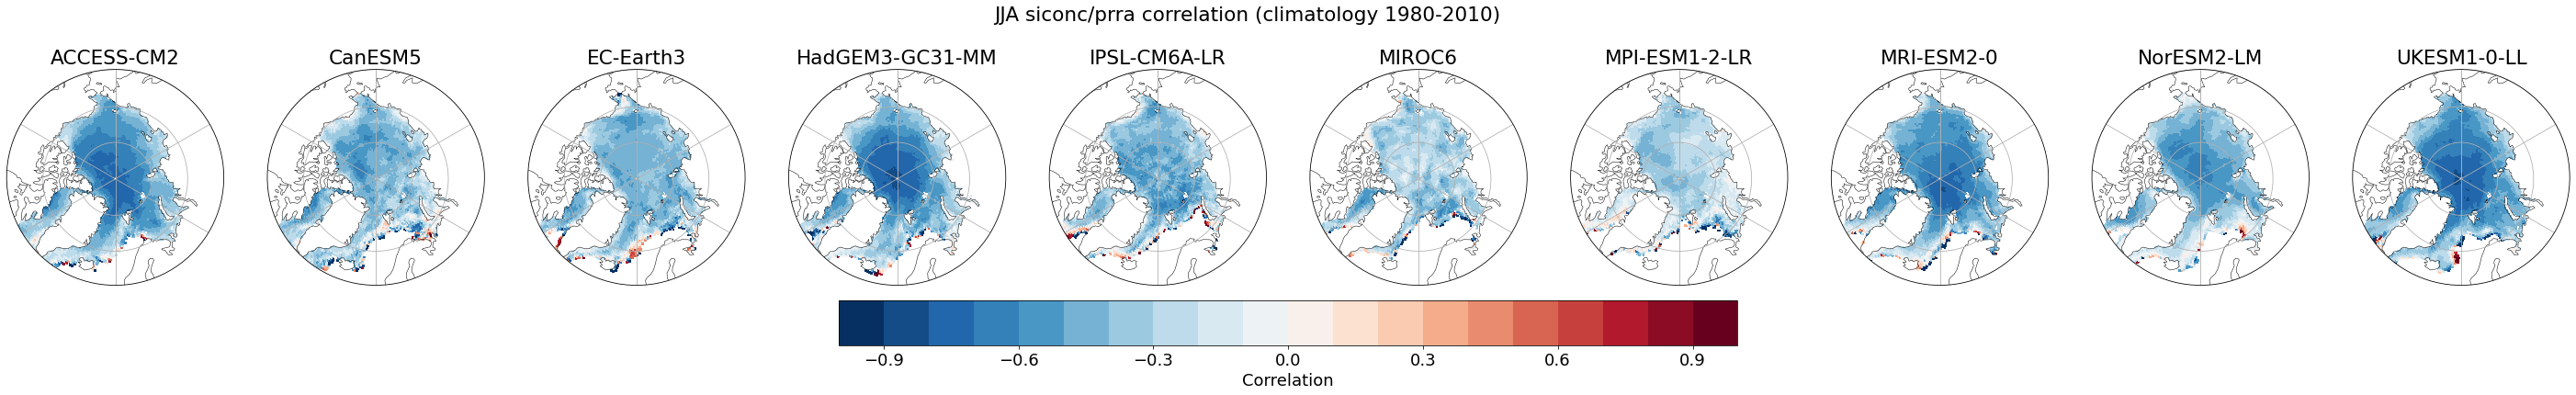

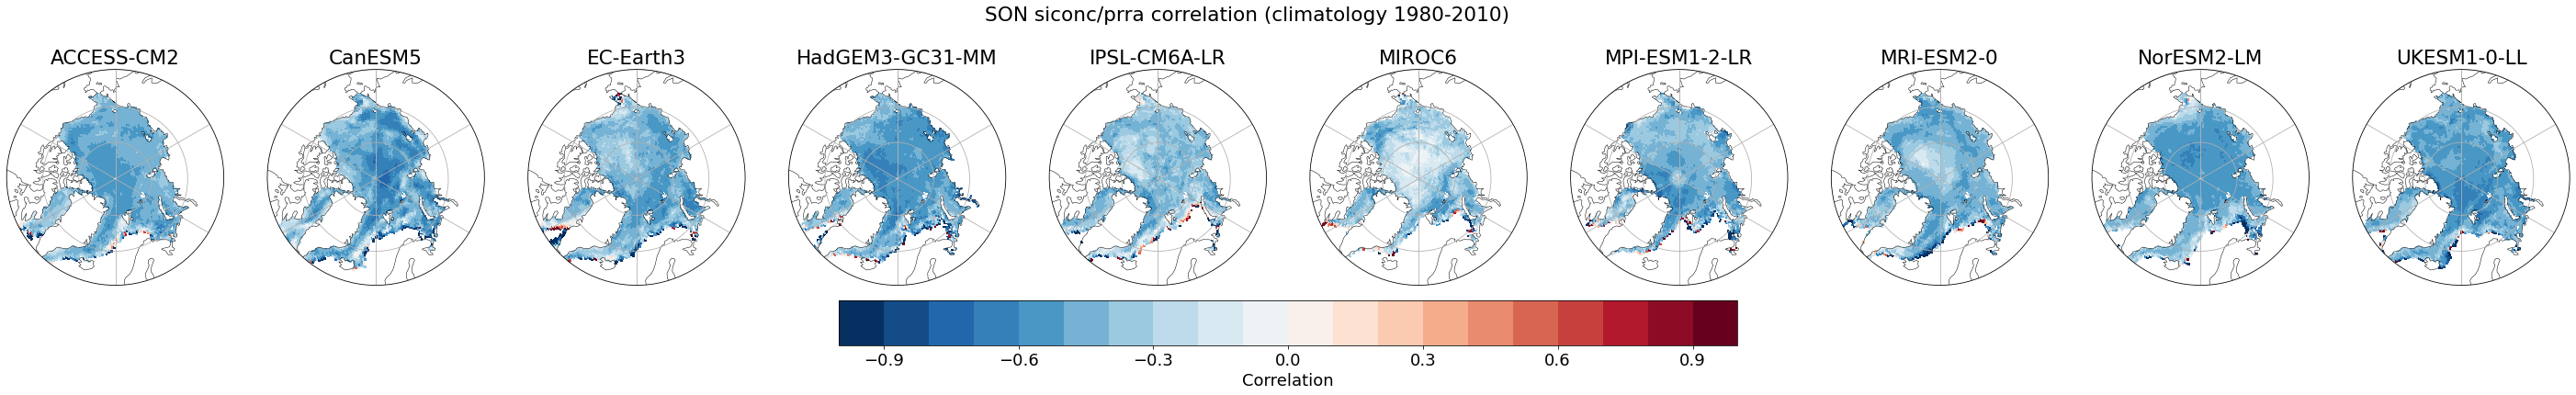

In [7]:
ensemble_si_edited = [{
    'data': item['data'].where(item['data'] > 0.15),
    'source_id': item['source_id']
} for item in ensemble_si]

libs.analysis.correlation_spatial_clim(ensemble_si_edited, ensemble_prra)